Redtide Binary Classification Model

    Machine Learning CONV3d with Early stopping that classifies images as redtide (1) or null redtide (0).
    0: No Redtide present
    1: Redtide present
    
    Data:
    Null images: handpicked from combinations of google keywords:'Florida', 'coastal', 'water', 'blue', 'coast', 'drone'.
    Redtide Images: " ": 'Florida', 'redtide', 'blooms', 'offshore', 'coastal', 'karenia', 'brevis'.
    Data set is increased to 64 training images by rotating images 90, 180, and 270 degrees.
        Training data: 32 Null images; 32 Redtide images
        Test Data: 8 Null images; 12 Redtide images
    
    Maximum model val_accuracy: 100%
    Minimum model val_accuracy: 65%
        'early stopping': Max Accuracy, Min Value_loss, and Min Val_accuracy.
            Maximizes model value_accuracy: >90%.

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Conv3D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
def convimage(imagex):
    imagex = Image.open(imagex)
    imagex =  imagex.resize((225, 150))
    imagex = image.img_to_array(imagex, data_format=None, dtype=None)
    imagex = np.reshape(imagex, (1,150, 225, 3))
    return imagex

def convimage90(imagex):
    imagex = Image.open(imagex)
    imagex = imagex.rotate(90)
    imagex =  imagex.resize((225, 150))
    imagex = image.img_to_array(imagex, data_format=None, dtype=None)
    imagex = np.reshape(imagex, (1,150, 225, 3))
    return imagex
    
def convimage180(imagex):
    imagex = Image.open(imagex)
    imagex = imagex.rotate(180)
    imagex =  imagex.resize((225, 150))
    imagex = image.img_to_array(imagex, data_format=None, dtype=None)
    imagex = np.reshape(imagex, (1,150, 225, 3))
    return imagex
    
def convimage270(imagex):
    imagex = Image.open(imagex)
    imagex = imagex.rotate(270)
    imagex =  imagex.resize((225, 150))
    imagex = image.img_to_array(imagex, data_format=None, dtype=None)
    imagex = np.reshape(imagex, (1,150, 225, 3))
    return imagex

In [4]:
KBx1 = convimage(r'C:\Users\matth\Pictures\KBX\RT1.jpg')
KBx2 = convimage(r'C:\Users\matth\Pictures\KBX\RT2.jpg')
KBx3 = convimage(r'C:\Users\matth\Pictures\KBX\RT3.jpg')
KBx4 = convimage(r'C:\Users\matth\Pictures\KBX\RT4.jpg')
KBx5 = convimage(r'C:\Users\matth\Pictures\KBX\RT5.jpg')
KBx6 = convimage(r'C:\Users\matth\Pictures\KBX\RT6.jpg')
KBx7 = convimage(r'C:\Users\matth\Pictures\KBX\RT7.jpg')
KBx8 = convimage(r'C:\Users\matth\Pictures\KBX\RT8.jpg')
KBx9 = convimage(r'C:\Users\matth\Pictures\KBX\RT9.jpg')
KBx10 = convimage(r'C:\Users\matth\Pictures\KBX\RT10.jpg')
FLcoast1 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl1.jpg')
FLcoast2 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl2.jpg')
FLcoast3 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl3.jpg')
FLcoast4 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl4.jpg')
FLcoast5 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl5.jpg')
FLcoast6 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl6.jpg')
FLcoast7 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl7.jpg')
FLcoast8 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl8.jpg')
FLcoast9 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl9.jpg')
FLcoast10 = convimage(r'C:\Users\matth\Pictures\FLCOAST\fl10.jpg')
KBx190 = convimage90(r'C:\Users\matth\Pictures\KBX\RT1.jpg')
KBx290 = convimage90(r'C:\Users\matth\Pictures\KBX\RT2.jpg')
KBx390 = convimage90(r'C:\Users\matth\Pictures\KBX\RT3.jpg')
KBx490 =convimage90(r'C:\Users\matth\Pictures\KBX\RT4.jpg')
KBx590 = convimage90(r'C:\Users\matth\Pictures\KBX\RT5.jpg')
KBx690 = convimage90(r'C:\Users\matth\Pictures\KBX\RT6.jpg')
KBx790 = convimage90(r'C:\Users\matth\Pictures\KBX\RT7.jpg')
KBx890 = convimage90(r'C:\Users\matth\Pictures\KBX\RT8.jpg')
KBx990 = convimage90(r'C:\Users\matth\Pictures\KBX\RT9.jpg')
KBx1090 = convimage90(r'C:\Users\matth\Pictures\KBX\RT10.jpg')
FLcoast190 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl1.jpg')
FLcoast290 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl2.jpg')
FLcoast390 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl3.jpg')
FLcoast490 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl4.jpg')
FLcoast590 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl5.jpg')
FLcoast690 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl6.jpg')
FLcoast790 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl7.jpg')
FLcoast890 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl8.jpg')
FLcoast990 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl9.jpg')
FLcoast1090 = convimage90(r'C:\Users\matth\Pictures\FLCOAST\fl10.jpg')
KBx1180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT1.jpg')
KBx2180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT2.jpg')
KBx3180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT3.jpg')
KBx4180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT4.jpg')
KBx5180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT5.jpg')
KBx6180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT6.jpg')
KBx7180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT7.jpg')
KBx8180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT8.jpg')
KBx9180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT9.jpg')
KBx10180 = convimage180(r'C:\Users\matth\Pictures\KBX\RT10.jpg')
FLcoast1180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl1.jpg')
FLcoast2180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl2.jpg')
FLcoast3180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl3.jpg')
FLcoast4180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl4.jpg')
FLcoast5180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl5.jpg')
FLcoast6180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl6.jpg')
FLcoast7180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl7.jpg')
FLcoast8180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl8.jpg')
FLcoast9180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl9.jpg')
FLcoast10180 = convimage180(r'C:\Users\matth\Pictures\FLCOAST\fl10.jpg')
KBx1270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT1.jpg')
KBx2270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT2.jpg')
KBx3270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT3.jpg')
KBx4270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT4.jpg')
KBx5270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT5.jpg')
KBx6270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT6.jpg')
KBx7270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT7.jpg')
KBx8270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT8.jpg')
KBx9270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT9.jpg')
KBx10270 = convimage270(r'C:\Users\matth\Pictures\KBX\RT10.jpg')
FLcoast1270= convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl1.jpg')
FLcoast2270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl2.jpg')
FLcoast3270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl3.jpg')
FLcoast4270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl4.jpg')
FLcoast5270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl5.jpg')
FLcoast6270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl6.jpg')
FLcoast7270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl7.jpg')
FLcoast8270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl8.jpg')
FLcoast9270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl9.jpg')
FLcoast10270 = convimage270(r'C:\Users\matth\Pictures\FLCOAST\fl10.jpg')

In [5]:
redtidetest = convimage(r'C:\Users\matth\Pictures\Redtide Test\redtidetest.jpg')
redtidetest2 = convimage(r'C:\Users\matth\Pictures\Redtide Test\redtidetest2.jpg') 
redtidetest3 = convimage(r'C:\Users\matth\Pictures\Redtide Test\redtidetest3.jpg')
redtidenull = convimage(r'C:\Users\matth\Pictures\Redtide Test\redtidenull.jpg')
redtidenull2 = convimage(r'C:\Users\matth\Pictures\Redtide Test\redtidenull2.jpg')

redtidetest90 = convimage90(r'C:\Users\matth\Pictures\Redtide Test\redtidetest.jpg')
redtidetest180 = convimage180(r'C:\Users\matth\Pictures\Redtide Test\redtidetest.jpg')
redtidetest270 = convimage270(r'C:\Users\matth\Pictures\Redtide Test\redtidetest.jpg')
redtidetest290 = convimage90(r'C:\Users\matth\Pictures\Redtide Test\redtidetest2.jpg') 
redtidetest2180 = convimage180(r'C:\Users\matth\Pictures\Redtide Test\redtidetest2.jpg') 
redtidetest2270 = convimage270(r'C:\Users\matth\Pictures\Redtide Test\redtidetest2.jpg') 
redtidetest390 = convimage90(r'C:\Users\matth\Pictures\Redtide Test\redtidetest3.jpg')
redtidetest3180 = convimage180(r'C:\Users\matth\Pictures\Redtide Test\redtidetest3.jpg')
redtidetest3270 = convimage270(r'C:\Users\matth\Pictures\Redtide Test\redtidetest3.jpg')
redtidenull90 = convimage90(r'C:\Users\matth\Pictures\Redtide Test\redtidenull.jpg')
redtidenull180 = convimage180(r'C:\Users\matth\Pictures\Redtide Test\redtidenull.jpg')
redtidenull270 = convimage270(r'C:\Users\matth\Pictures\Redtide Test\redtidenull.jpg')
redtidenull290 = convimage90(r'C:\Users\matth\Pictures\Redtide Test\redtidenull2.jpg')
redtidenull2180 = convimage180(r'C:\Users\matth\Pictures\Redtide Test\redtidenull2.jpg')
redtidenull2270 = convimage270(r'C:\Users\matth\Pictures\Redtide Test\redtidenull2.jpg')

In [6]:
X = [[FLcoast1,FLcoast2,FLcoast3,FLcoast4,KBx1,KBx2,KBx3,KBx4,KBx5,
      FLcoast6,FLcoast8,FLcoast9,FLcoast10,KBx6,KBx7,KBx8,
      KBx190,KBx290,KBx390,KBx490,KBx590,KBx690,KBx790,KBx890,
      FLcoast190,FLcoast290,FLcoast390,FLcoast490,FLcoast690,FLcoast890,FLcoast990,FLcoast1090,
      KBx1180,KBx2180,KBx3180,KBx4180,KBx5180,KBx6180,KBx7180,KBx8180,
      FLcoast1180,FLcoast2180,FLcoast3180,FLcoast4180,FLcoast6180,FLcoast8180,FLcoast9180,FLcoast10180,
      KBx1270,KBx2270,KBx3270,KBx4270,KBx5270,KBx6270,KBx7270,KBx8270,
      FLcoast1270,FLcoast2270,FLcoast3270,FLcoast4270,FLcoast6270,FLcoast8270,FLcoast9270,FLcoast10270]]
X_test = [[redtidetest,redtidetest2,redtidetest3,
           redtidenull,redtidenull2,
           redtidetest90,redtidetest180,redtidetest270,
           redtidetest290,redtidetest2180,redtidetest2270,
           redtidetest390,redtidetest3180,redtidetest3270,
           redtidenull90,redtidenull180,redtidenull270,
           redtidenull290,redtidenull2180,redtidenull2270]]
y = np.array([0,0,0,0,1,1,1,1,1,
              0,0,0,0,1,1,1,
              1,1,1,1,1,1,1,1,
              0,0,0,0,0,0,0,0,
              1,1,1,1,1,1,1,1,
              0,0,0,0,0,0,0,0,
              1,1,1,1,1,1,1,1,
              0,0,0,0,0,0,0,0])
y_test = np.array([1,1,1,
                   0,0,
                   1,1,1,1,1,1,1,1,1,
                   0,0,0,0,0,0])

In [7]:
num_classes = 0

In [8]:
#y = to_categorical(y,num_classes)
#y_test = to_categorical(y_test,num_classes)

In [9]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [10]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
early_stop1 = EarlyStopping(monitor='accuracy',mode='max',verbose=1,patience=10)
early_stop2 = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=15)
early_stop3 = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=10)

In [12]:
model = Sequential()

model.add(Conv3D(3, (1,3,3),input_shape=(1, 150, 225, 3),padding='same',activation='relu'))
model.add(Conv3D(3, (1,3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(x=X,y=y,epochs=100,validation_data=(X_test,y_test),
          callbacks=[early_stop1,early_stop2,early_stop3])

Train on 64 samples, validate on 20 samples
Epoch 1/100
32/64 [==============>...............] - ETA: 0s - loss: 11.9821 - accuracy: 0.9062 - val_loss: 3.9604 - val_accuracy: 0.9500Epoch 00023: early stopping


In [14]:
model.history.history

{'loss': [12.66851806640625,
  919.3203735351562,
  67.3947982788086,
  339.72918701171875,
  406.3263854980469,
  86.60789489746094,
  95.18103790283203,
  213.47824096679688,
  190.29177856445312,
  64.34420013427734,
  35.80887222290039,
  61.099456787109375,
  51.928062438964844,
  213.19503784179688,
  90.21868896484375,
  15.607552528381348,
  14.04771900177002,
  53.578861236572266,
  63.492374420166016,
  25.354564666748047,
  32.99072265625,
  20.44908332824707,
  11.982083320617676],
 'accuracy': [0.4375,
  0.53125,
  0.8125,
  0.625,
  0.46875,
  0.6875,
  0.75,
  0.625,
  0.6875,
  0.78125,
  0.90625,
  0.78125,
  0.875,
  0.65625,
  0.78125,
  0.84375,
  0.9375,
  0.8125,
  0.78125,
  0.9375,
  0.90625,
  0.8125,
  0.90625],
 'val_loss': [1062.354248046875,
  156.88131713867188,
  195.16082763671875,
  204.1941680908203,
  24.399831771850586,
  94.8440933227539,
  274.8506774902344,
  287.8186950683594,
  208.1503448486328,
  100.21983337402344,
  27.194082260131836,
  0.1

In [15]:
loss_df = pd.DataFrame(model.history.history)

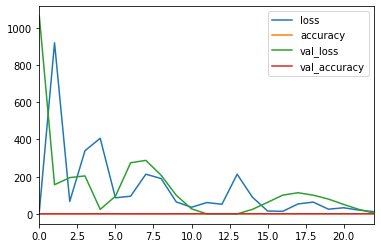

In [16]:
loss_df.plot()

In [17]:
predictions = model.predict(X_test)

In [18]:
predictions

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.9885049e-35],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [19]:
y_test

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [20]:
predictions = pd.DataFrame(predictions,columns=['pred'])
y_test = pd.DataFrame(y_test,columns=['true_y'])

In [21]:
predplot = pd.concat([predictions,y_test],axis=1)

In [22]:
predplot = np.round(predplot)
predictions = np.round(predictions)

In [23]:
predplot

,pred,true_y
0,1.0,1
1,1.0,1
2,1.0,1
3,0.0,0
4,0.0,0
5,1.0,1
6,1.0,1
7,1.0,1
8,1.0,1
9,0.0,1


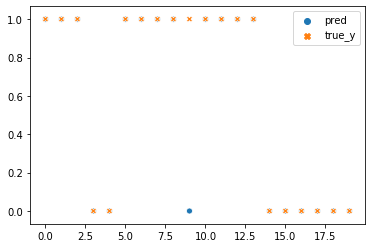

In [24]:
#1 = KB
#0 = null
sns.scatterplot(data=predplot)

In [25]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94         9
         1.0       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



In [26]:
print(confusion_matrix(predictions,y_test))

[[ 8  1]
 [ 0 11]]
